## Imports y clases auxiliares

In [1]:
## Math
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, ifft, fftfreq
from NDEToolkit import RfAnalyze

## Operations
import os
from pathlib import Path
import NDEToolkit as ndt

## Visualization
import matplotlib.pyplot as plt
from PIL import Image

%gui qt

## Clase

In [2]:
import numpy as np
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, ifft, fftfreq

class FFTAnalyze:
    
    def __init__(self):
        
        self.ref = None #Reference signal ndarray 1D
        self.ref_loaded = False #Control var, True if reference signal is loaded
        self.left = 0
        self.right = 0
        
    def set_ref_window(self,signal ,left ,right): #Set reference signal window
        
        self.left = left
        
        self.right = right
        
        self.ref = np.zeros(signal.shape) #reference 0s signal
        
        self.ref[left:right] = signal[left:right] #Copying window values from signal to reference
        
        self.ref_loaded = True 
        
        return self.ref 
    
    def get_ref(self): #Returns reference signal if already computed
        
        if not self.ref_laoded :
            
            print("No reference signal computed")
            
            return None
        
        return self.ref
    
    def backwall_window_volume(self,volume,lam_thickness,c_mat,fs): #backwall window 3d
        
        return np.apply_along_axis(self.backwall_window,2,volume,lam_thickness,c_mat,fs)
    
    
    def backwall_window(self,signal,lam_thickness,c_mat,fs):#signal should be analityc
        
        env = np.abs(signal) #envelope
        
        #First we get the window
        
        arg_max = np.argmax(env)  #Materials entry
        fin_mat = np.int( arg_max + lam_thickness * fs/ c_mat ) #theorical Materials exit
        
         # Returns the real materials exit
        
        if (fin_mat > 500):
            
            x_out = 0
        
        else:
           
            rango = range(fin_mat-5,fin_mat+5) #range around materials exit
            x_out = (fin_mat-5+np.argmax(env[rango])) # materials exit - 5 + windows max index
            
        
        # slicing to get the window
        l = len(signal) #signals len
        
        if (x_out != 0): # if is not back-wall
            
            result = np.zeros(shape=signal.shape) #zeros shaped as signal
            
            result[self.left:self.right] = signal[int(x_out-np.floor((self.right-self.left)/2)):int(x_out+np.floor((self.right-self.left)/2))] #copy window from signal to result
            
            return result
        
        if (x_out == 0): #means is back-wall due to arg_out func
            
            return np.zeros(shape=self.ref.shape) # zeros shaped as signal
        
        
        
    def backscattered_window_volume(self,volume,mask1,mask2):
        
        return np.apply_along_axis(self.backscattered_window,2,volume,mask1,mask2)
        
        
    def backscattered_window(self,signal,mask1,mask2): #Gets signal windowed in backscattered
        
        cropped = np.zeros(shape=signal.shape)
        
        cropped[mask1:mask2] = signal[mask1:mask2]
        
        return cropped 
    
    
    def fourier_volume(self,volume,fs): #signal must be windowed
    
        frec_vec = fftfreq(self.ref.size, d=1/fs*1e6)
        
        fft_ref = np.abs(fft(self.ref)) 
        
        fft_signal = np.abs(np.apply_along_axis(fft,2,volume))
        
        return frec_vec,fft_ref,fft_signal
    
    def fourier(self,signal,fs): #signal must be windowed
        
        frec_vec = fftfreq(self.ref.size, d=1/fs*1e6)
        
        fft_ref = np.abs(fft(self.ref))
        
        fft_signal = np.abs(fft(signal)) 
        
        return frec_vec,fft_ref,fft_signal
        
    
    def normalize(self,signal):
        
        return signal / np.abs(fft(self.ref))
        

## Carga volumenes

In [3]:
## Declaring the paths to the folders of work

# Solves the path for any operative system.

# Solves the path for any operative system.
folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp') 
folder_to_save = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

# Name of the files
ruta_data1 = folder_to_read /   '20210407_phase_vols/0_phase_5MHz\COUPON7_PHASE_5MHz'
ruta_data2 = folder_to_read /   '20210407_phase_vols/0_phase_10MHz/COUPON7_PHASE_10MHz'

# Assigning images to variables
c7_5MHz = ndt.napari_read_tiff(ruta_data1,folder=True)
c7_10MHz =  ndt.napari_read_tiff(ruta_data2,folder=True)
c7_5MHz.shape, c7_10MHz.shape

NameError: name 'ptom' is not defined

## FFT analysis 1D

In [ ]:
ff = FFTAnalyze()

(100.0, 350.0)

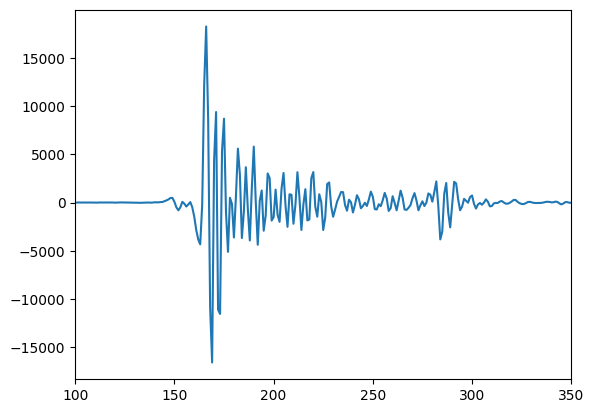

In [ ]:
#Define signal
signal = c7_10MHz[135,145,:]
plt.plot(signal)
plt.xlim(100,350)

(800.0, 1000.0)

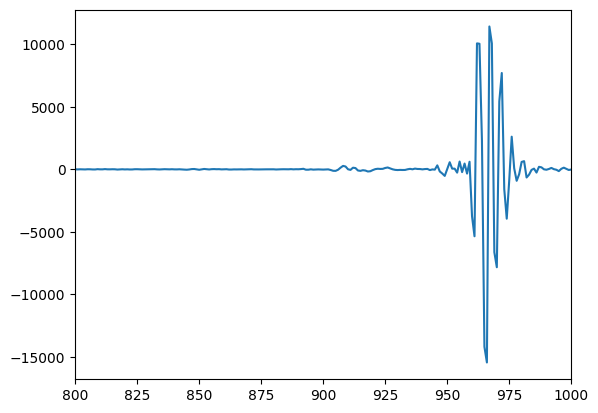

In [ ]:
#Define ref signal
ref_signal = c7_10MHz[100,50,:]
plt.plot(ref_signal)
plt.xlim(800,1000)

(800.0, 1000.0)

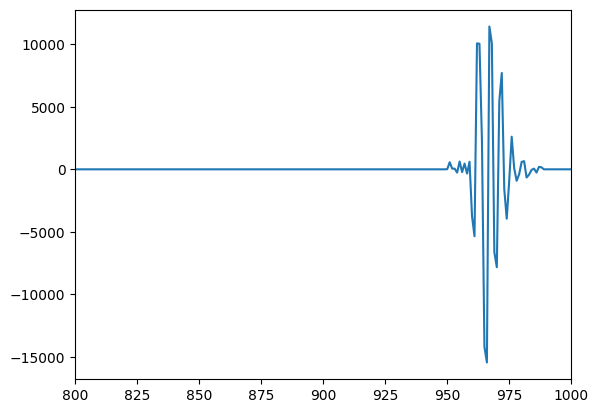

In [ ]:
#Ref Window setting
ref = ff.set_ref_window(ref_signal,950,990)
plt.plot(ref)
plt.xlim(800,1000)

### Backwall FFT

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_22020\2410478614.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fin_mat = np.int( arg_max + lam_thickness * fs/ c_mat ) #theorical Materials exit
C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_22020\2410478614.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  result[self.left:self.right] = signal[int(x_out-np.floor((self.right-self.left)/2)):int(x_out+np.floor((self.right-self.left)/2))] #copy window from signal to result


(800.0, 1000.0)

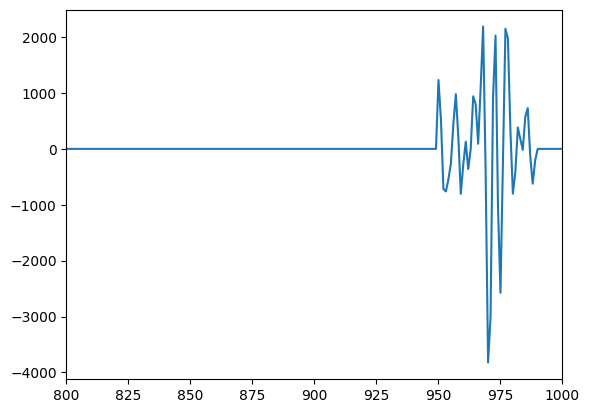

In [ ]:
#backwall window
analytic = hilbert(signal)
lam_thickness = 5e-3 # m 
c_mat = 1650 # m/s
fs = 40*1e6 # 40 MHz = 40e6
backwall_signal = ff.backwall_window(analytic,lam_thickness,c_mat,fs)
plt.plot(backwall_signal)
plt.xlim(800,1000)

In [ ]:
frecs,ref_fourier,signal_fourier = ff.fourier(backwall_signal,fs)

(2.0, 13.0)

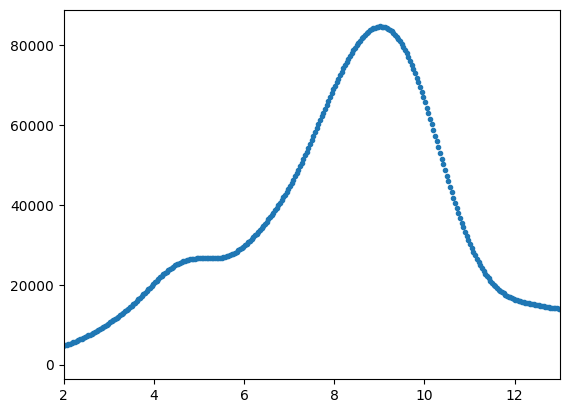

In [ ]:
plt.plot(frecs,ref_fourier,'.')
plt.xlim(2,13)

(2.0, 13.0)

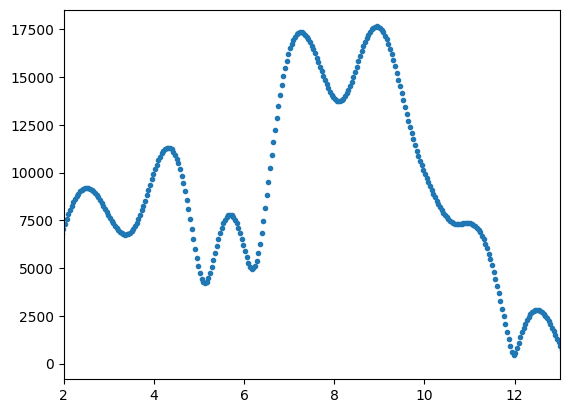

In [ ]:
plt.plot(frecs,signal_fourier,'.')
plt.xlim(2,13)

### Backscattered FFT

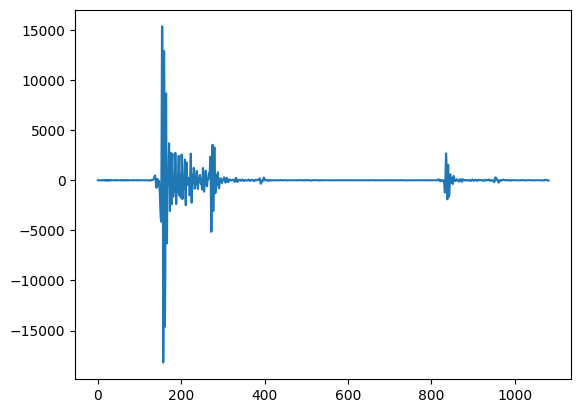

In [ ]:
ff1,ff2 = 180,260
signal = c7_10MHz[177,178,:]
plt.plot(signal)

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_22020\2410478614.py:90: ComplexWarning: Casting complex values to real discards the imaginary part
  cropped[mask1:mask2] = signal[mask1:mask2]


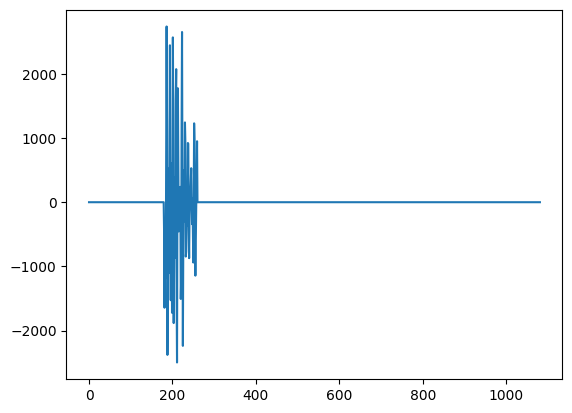

In [ ]:
#basckscattered window
analytic = hilbert(signal)
lam_thickness = 5e-3 # m 
c_mat = 1650 # m/s
fs = 40*1e6 # 40 MHz = 40e6
backscattered_signal = ff.backscattered_window(analytic,ff1,ff2)
plt.plot(backscattered_signal)

In [ ]:
frecs,ref_fourier,signal_fourier = ff.fourier(backscattered_signal,fs)

(2.0, 13.0)

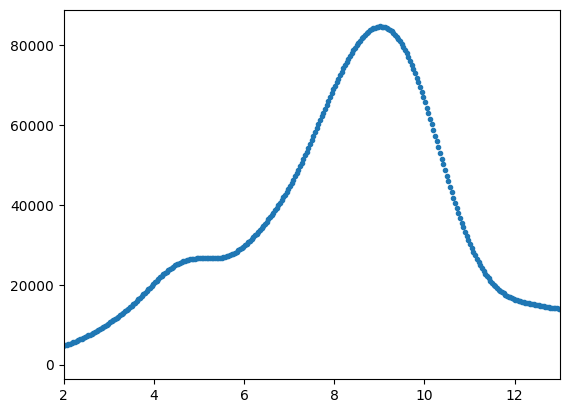

In [ ]:
plt.plot(frecs,ref_fourier,'.')
plt.xlim(2,13)

(0.0, 15.0)

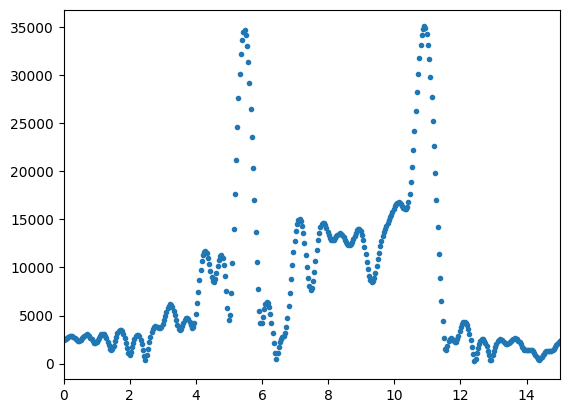

In [ ]:
plt.plot(frecs,signal_fourier,'.')
plt.xlim(0,15)

## 3D

In [ ]:
ff = FFTAnalyze()

(800.0, 1000.0)

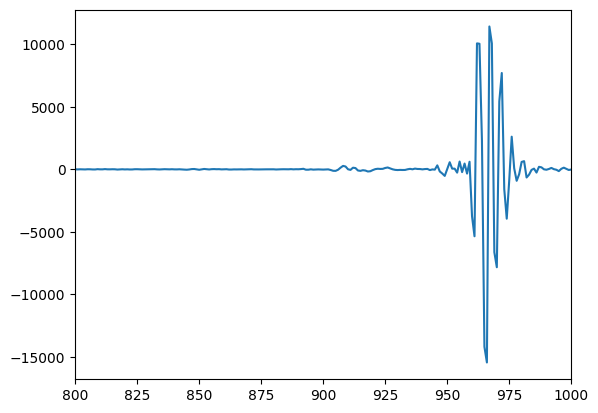

In [ ]:
#Define ref signal
ref_signal = c7_10MHz[100,50,:]
plt.plot(ref_signal)
plt.xlim(800,1000)

(800.0, 1000.0)

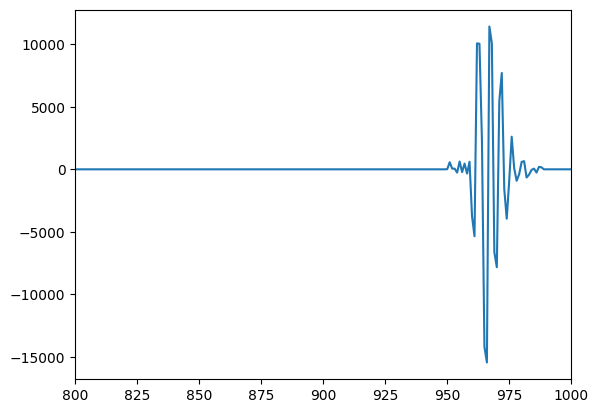

In [ ]:
#Ref Window setting
ref = ff.set_ref_window(ref_signal,950,990)
plt.plot(ref)
plt.xlim(800,1000)

In [ ]:
volume = c7_10MHz

### Backwall

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_22020\2410478614.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fin_mat = np.int( arg_max + lam_thickness * fs/ c_mat ) #theorical Materials exit
C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_22020\2410478614.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  result[self.left:self.right] = signal[int(x_out-np.floor((self.right-self.left)/2)):int(x_out+np.floor((self.right-self.left)/2))] #copy window from signal to result


(800.0, 1000.0)

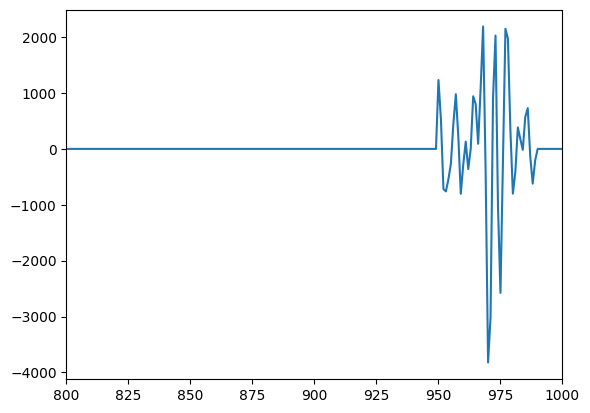

In [ ]:
#backwall window volume
analyze = RfAnalyze(volume)
analytic = analyze.analytic()
lam_thickness = 5e-3 # m 
c_mat = 1650 # m/s
fs = 40*1e6 # 40 MHz = 40e6
backwall_signal = ff.backwall_window_volume(analytic,lam_thickness,c_mat,fs)
plt.plot(backwall_signal[135,145])
plt.xlim(800,1000)

In [ ]:
frecs,ref_fourier,signal_fourier = ff.fourier_volume(backwall_signal,fs)

(2.0, 13.0)

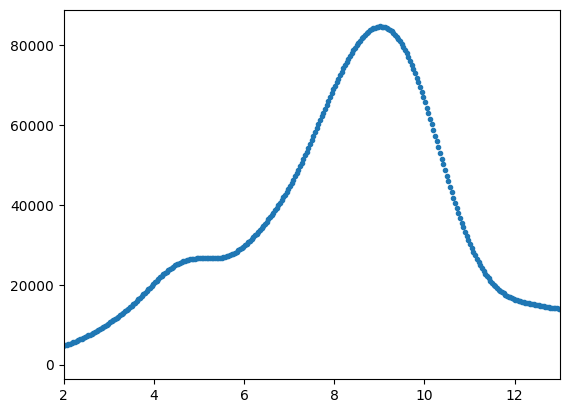

In [ ]:
plt.plot(frecs,ref_fourier,'.')
plt.xlim(2,13)

(2.0, 13.0)

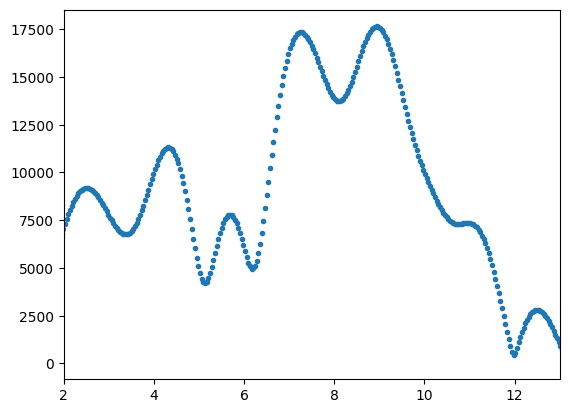

In [ ]:
plt.plot(frecs,signal_fourier[135,145],'.')
plt.xlim(2,13)

In [ ]:
signal_fourier = ff.normalize(signal_fourier)

In [ ]:
## Saving
ndt.write_tiff(signal_fourier,folder_to_save / 'c7_10MHz_backswall_freq_dom_pruebas')

Saving array as pic in path
Volume saved


### Backscattered

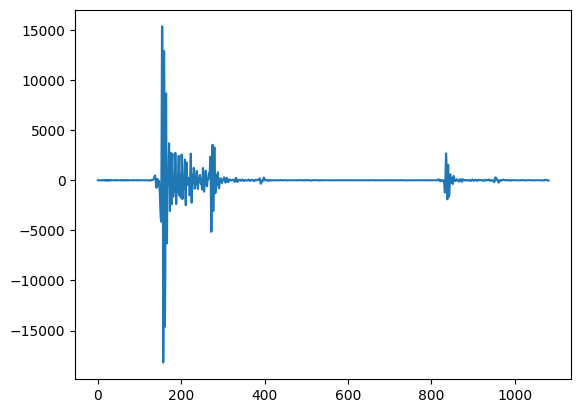

In [ ]:
plt.plot(volume[177,178])

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_22020\2410478614.py:90: ComplexWarning: Casting complex values to real discards the imaginary part
  cropped[mask1:mask2] = signal[mask1:mask2]


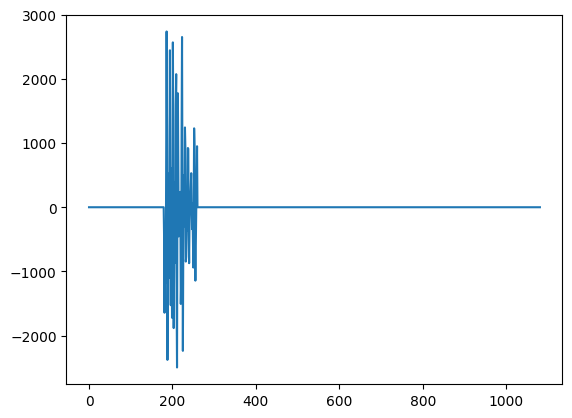

In [ ]:
#basckscattered window volume
ff1,ff2 = 180,260
analyze = RfAnalyze(volume)
analytic = analyze.analytic()
lam_thickness = 5e-3 # m 
c_mat = 1650 # m/s
fs = 40*1e6 # 40 MHz = 40e6
backscattered_signal = ff.backscattered_window_volume(analytic,ff1,ff2)
plt.plot(backscattered_signal[177,178])

In [ ]:
frecs,ref_fourier,signal_fourier = ff.fourier_volume(backscattered_signal,fs)

(2.0, 13.0)

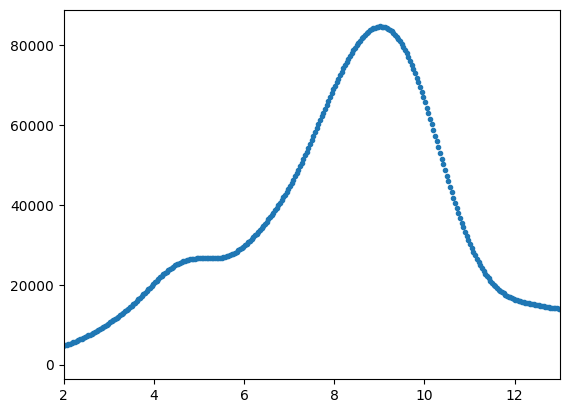

In [ ]:
plt.plot(frecs,ref_fourier,'.')
plt.xlim(2,13)

(2.0, 13.0)

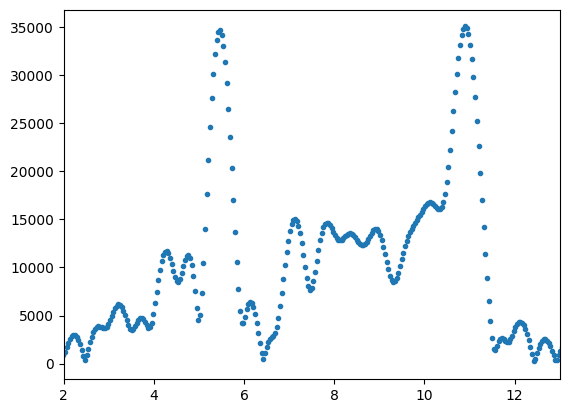

In [ ]:
plt.plot(frecs,signal_fourier[177,178],'.')
plt.xlim(2,13)

In [ ]:
signal_fourier = ff.normalize(signal_fourier)

In [ ]:
## Saving
ndt.write_tiff(signal_fourier,folder_to_save / 'c7_10MHz_backscattered_freq_dom_pruebas')

Saving array as pic in path
Volume saved
